In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler


df = pd.read_hdf('out.h5','Z1')
print(df.shape)
df.head()


(188954, 10)


,0,1,2,3,4,5,6,7,8,9
cid,,,,,,,,,,
1,0.679365,11.537860,18.222782,21.118836,22.508356,10.895138,18.757425,16.921658,8.753657,2.909216
1,0.687775,12.067177,19.315660,22.580383,24.168310,11.411889,19.575517,18.083309,10.288137,3.683025
1,0.685783,11.363800,17.701377,20.483345,21.832096,10.829531,18.182115,15.891454,8.332188,3.058426
1,0.662127,26.904865,46.216304,53.899270,57.417560,23.903419,51.446106,49.994882,22.248222,4.666387
1,0.673390,17.385204,30.678872,36.661953,39.555465,15.493599,31.989563,33.283961,19.043089,6.405601


In [2]:
df.describe()

,0,1,2,3,4,5,6,7,8,9
count,188954.000000,188954.000000,188954.000000,188954.000000,188954.000000,188954.000000,188954.000000,188954.000000,188954.000000,188954.000000
mean,0.721167,14.966863,25.357852,29.976021,32.197491,13.664511,26.120725,26.216262,14.648706,4.688846
std,0.158754,3.198511,6.677281,8.312947,9.113704,2.577628,7.135704,9.099349,5.914822,2.120508
min,0.328149,0.887707,0.937332,0.950452,0.955722,0.948363,0.687415,0.183309,0.017983,0.000649
25%,0.666967,12.606544,20.277644,23.730696,25.408451,11.766988,20.786892,19.455581,10.488767,3.182165
50%,0.679721,14.683239,24.116090,28.348708,30.400215,13.592648,25.257419,24.346790,13.285061,4.207843
75%,0.696153,16.706814,29.051961,34.550157,37.197450,15.025473,30.049484,31.166858,17.828262,5.828033
max,1.474308,42.045340,67.105312,81.181246,87.899562,39.709149,72.813222,81.989612,54.538826,17.923397


In [24]:
inertia = []
K_range = range(5, 51,5)
K_range = list(K_range)
K_range.insert(1, 7)
for k in K_range:
    model = KMeans(n_clusters=k).fit(df)
    inertia.append(model.inertia_)



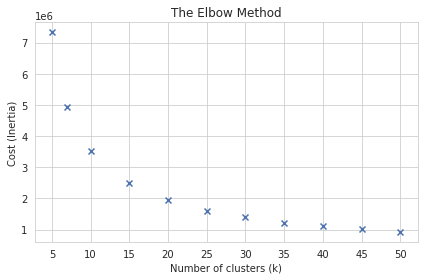

In [26]:

sns.set_style("whitegrid")
sns.set_palette('deep')
plt.figure(figsize=(6, 4))
plt.scatter(K_range, inertia, marker='x')
plt.xticks(np.arange(min(K_range), max(K_range)+1, 5.0))
plt.title('The Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Cost (Inertia)')
plt.tight_layout()
plt.savefig('inertia.png',bbox_inches="tight", dpi=100) 

In [4]:
k=50
model = KMeans(n_clusters=k).fit(df)

print(model.inertia_)
print(model.cluster_centers_[:,0])

929092.226042088
[0.7098477  0.79282498 0.72988179 0.70265207 0.7024145  0.73528283
 0.72212011 0.75920033 0.70333259 0.69575494 0.72234302 0.69718072
 0.69539859 0.71131742 0.72597557 0.71623205 0.73607896 0.81175726
 0.81326463 0.71210905 0.69953196 0.71227056 0.71186226 0.77098649
 0.71651967 0.70977917 0.71352056 0.76143429 0.73944988 0.68715706
 0.72340192 0.71708412 0.6967842  0.69993225 0.71039265 0.71856285
 0.70543007 0.69405314 0.71005657 0.72433062 0.70642574 0.74802609
 0.70534307 0.69753541 0.72023132 0.7205972  0.77344238 0.71208835
 0.70860326 0.758897  ]


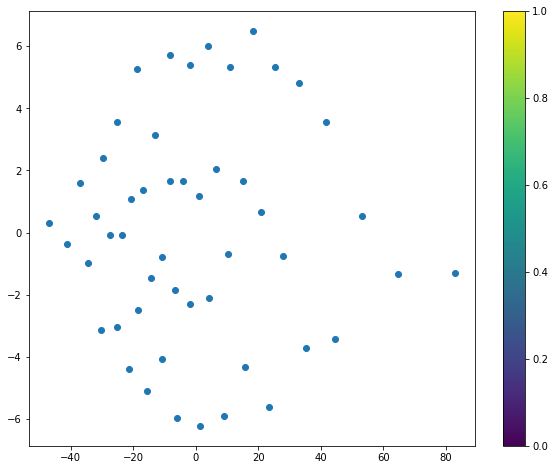

In [48]:
X = model.cluster_centers_
from sklearn.decomposition import PCA

model2 = PCA(n_components=2)
model2.fit(X)
x_pca = model2.transform(X)
%matplotlib inline 
#%matplotlib notebook
plt.figure(figsize=(10, 8))
plt.scatter(x_pca[:,0], x_pca[:,1])
plt.colorbar()

<IPython.core.display.Javascript object>


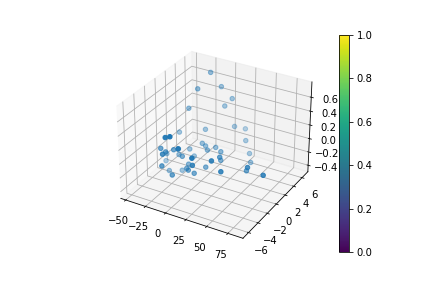

In [49]:

model3 = PCA(n_components=3)
model3.fit(X)
x_pca = model3.transform(X)
%matplotlib notebook 
# needed to rotate and scale 3D
#fig = plt.figure(figsize=(10, 10))
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
f=ax.scatter(x_pca[:,0], x_pca[:,1], x_pca[:,2], cmap='hot')
fig.colorbar(f)
plt.show()

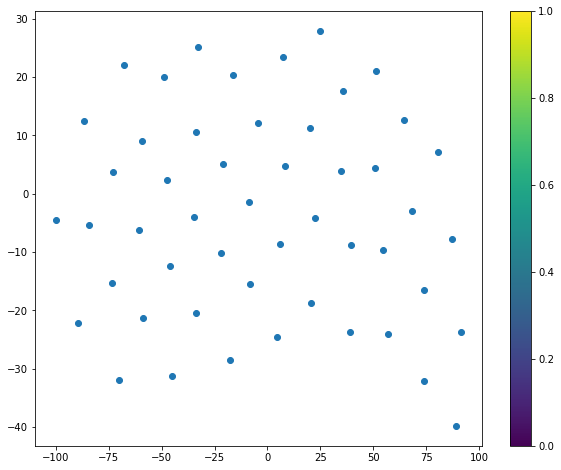

In [50]:
from  sklearn.manifold import TSNE
model = TSNE(n_components=2)
x_tsne = model.fit_transform(X)
%matplotlib inline 
#%matplotlib notebook
plt.figure(figsize=(10, 8))
plt.scatter(x_tsne[:,0], x_tsne[:,1])
plt.colorbar()

<IPython.core.display.Javascript object>


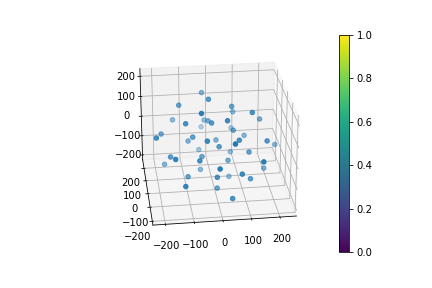

In [52]:
model = TSNE(n_components=3)
x_tsne = model.fit_transform(X)

# needed to rotate and scale 3D
%matplotlib notebook 
#fig = plt.figure(figsize=(10, 10))
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
f=ax.scatter(x_tsne[:,0], x_tsne[:,1], x_tsne[:,2] ,cmap='hot')
fig.colorbar(f)
plt.show()